In [1]:
#Training the image classifier
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# os.environ['TORCH_USE_CUDA_DSA'] = "1"
import torch
import torchvision
import torchvision.transforms as transforms
from Bio.Seq import Seq
import os
import glob
import pathlib
import pickle
import numpy as np
import random

In [2]:
strep_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\strep_train.txt', 'rb'))
lacto_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\lacto_train.txt', 'rb'))
bac_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\bac_train.txt', 'rb'))
pseudo_train = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\training data\\pseudo_train.txt', 'rb'))

print(len(strep_train))
print(len(lacto_train))
print(len(bac_train))
print(len(pseudo_train))

# strep_train = strep_train[:len(strep_train)//2]
strep_train = random.sample(strep_train, len(lacto_train))
# lacto_train = lacto_train[:len(lacto_train)//2]
# bac_train = bac_train[:len(bac_train)//2]
bac_train = random.sample(bac_train, len(lacto_train))
# pseudo_train = pseudo_train[:len(pseudo_train)//2]
pseudo_train = random.sample(pseudo_train, len(lacto_train))

print(len(strep_train))
print(len(lacto_train))
print(len(bac_train))
print(len(pseudo_train))

strep_train_array = np.asarray(strep_train)
strep_train_array = np.reshape(strep_train_array, [len(strep_train_array), 1, 64, 64])
# print(strep_train_array.shape)

lacto_train_array = np.asarray(lacto_train)
lacto_train_array = np.reshape(lacto_train_array, [len(lacto_train_array), 1, 64, 64])
# print(lacto_train_array.shape)

bac_train_array = np.asarray(bac_train)
bac_train_array = np.reshape(bac_train_array, [len(bac_train_array), 1, 64, 64])
# print(bac_train_array.shape)

pseudo_train_array = np.asarray(pseudo_train)
pseudo_train_array = np.reshape(pseudo_train_array, [len(pseudo_train_array), 1, 64, 64])
# print(pseudo_train_array.shape)

train_full_list = np.concatenate((strep_train_array, lacto_train_array, bac_train_array, pseudo_train_array))

# print(train_full_list.shape)

# print(strep_train_array[5])

# print(train_full_list[5])

label_bac = np.ones(len(bac_train_array)) * 0
label_lacto = np.ones(len(lacto_train_array)) * 1
label_pseudo = np.ones(len(pseudo_train_array)) * 2
label_strep = np.ones(len(strep_train_array)) * 3

train_label_list = np.concatenate((label_strep, label_lacto, label_bac, label_pseudo))

# print(len(train_label_list))

56006
20238
117371
158129
20238
20238
20238
20238


In [3]:
strep_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\strep_test.txt', 'rb'))
lacto_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\lacto_test.txt', 'rb'))
bac_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\bac_test.txt', 'rb'))
pseudo_test = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\testing data\\pseudo_test.txt', 'rb'))

print(len(strep_test))
print(len(lacto_test))
print(len(bac_test))
print(len(pseudo_test))

# strep_test = strep_test[:len(strep_test)//2]
strep_test = random.sample(strep_test, len(lacto_test))
# lacto_test = lacto_test[:len(lacto_test)//2]
# bac_test = bac_test[:len(bac_test)//2]
bac_test = random.sample(bac_test, len(lacto_test))
# pseudo_test = pseudo_test[:len(pseudo_test)//2]
pseudo_test = random.sample(pseudo_test, len(lacto_test))

print(len(strep_test))
print(len(lacto_test))
print(len(bac_test))
print(len(pseudo_test))

strep_test_array = np.asarray(strep_test)
strep_test_array = np.reshape(strep_test_array, [len(strep_test_array), 1, 64, 64])
print(strep_test_array.shape)

lacto_test_array = np.asarray(lacto_test)
lacto_test_array = np.reshape(lacto_test_array, [len(lacto_test_array), 1, 64, 64])
print(lacto_test_array.shape)

bac_test_array = np.asarray(bac_test)
bac_test_array = np.reshape(bac_test_array, [len(bac_test_array), 1, 64, 64])
print(bac_test_array.shape)

pseudo_test_array = np.asarray(pseudo_test)
pseudo_test_array = np.reshape(pseudo_test_array, [len(pseudo_test_array), 1, 64, 64])
print(pseudo_test_array.shape)

test_full_list = np.concatenate((strep_test_array, lacto_test_array, bac_test_array, pseudo_test_array))

print(test_full_list.shape)

# print(strep_test_array[5])

# print(test_full_list[5])

label_bac = np.ones(len(bac_test_array)) * 0
label_lacto = np.ones(len(lacto_test_array)) * 1
label_pseudo = np.ones(len(pseudo_test_array)) * 2
label_strep = np.ones(len(strep_test_array)) * 3

test_label_list = np.concatenate((label_strep, label_lacto, label_bac, label_pseudo))

5737
1873
15115
17877
1873
1873
1873
1873
(1873, 1, 64, 64)
(1873, 1, 64, 64)
(1873, 1, 64, 64)
(1873, 1, 64, 64)
(7492, 1, 64, 64)


In [4]:
# train_full_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\train_final_data\\train_full_list.txt', 'rb'))
# train_label_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\train_final_data\\train_label_list.txt', 'rb'))
# test_full_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\test_final_data\\test_full_list.txt', 'rb'))
# test_label_list = pickle.load(open('C:\\Users\\patri\\Desktop\\pnnl single position here\\test_final_data\\test_label_list.txt', 'rb'))

In [5]:
# training dataset assembly
from torch.utils.data import TensorDataset, DataLoader

# use x_train and y_train as numpy array without further modification
x_train = np.array(train_full_list)
y_train = np.array(train_label_list)

# convert to numpys to tensor
tensor_x = torch.Tensor(x_train)
tensor_y = torch.Tensor(y_train)
# create the dataset
trainset = TensorDataset(tensor_x,tensor_y) 
# create your dataloader
trainloader = DataLoader(trainset,batch_size=256, shuffle=True) 

#check if you can get the desired things
i1, l1 = next(iter(trainloader))
print(i1.shape)   # torch.Size([1, 1, 28, 28]) 
print(l1.shape)   # torch.Size([1]) 


torch.Size([256, 1, 64, 64])
torch.Size([256])


In [6]:
# fix to custom dataset work?
from torch.utils.data import TensorDataset, DataLoader

# use x_train and y_train as numpy array without further modification
x_test = np.array(test_full_list)
y_test = np.array(test_label_list)

# convert to numpys to tensor
tensor_x1 = torch.Tensor(x_test)
tensor_y1 = torch.Tensor(y_test)
# create the dataset
testset = TensorDataset(tensor_x1,tensor_y1) 
# create your dataloader
testloader = DataLoader(testset,batch_size=256, shuffle=True) 

#check if you can get the desired things
i2, l2 = next(iter(testloader))
print(i2.shape)   # torch.Size([1, 1, 28, 28]) 
print(l2.shape)   # torch.Size([1]) 

torch.Size([256, 1, 64, 64])
torch.Size([256])


In [7]:
def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample
print(len(trainset))
print(len(testset))

80952
7492


In [8]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 256

classes = torch.Tensor([0, 1, 2, 3]).type(torch.LongTensor)

In [9]:
# shows image, likely unneeded
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


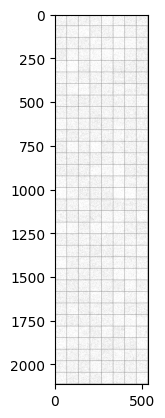

    3     2     3     2     1     2     0     2     0     0     1     2     0     1     2     3     3     0     2     2     0     0     1     0     0     1     0     0     1     1     2     3     1     1     2     1     2     3     3     0     2     2     2     2     2     3     3     3     2     1     1     2     3     2     2     0     3     2     3     0     3     3     2     1     2     3     2     0     2     2     2     3     1     2     2     3     0     1     0     0     2     0     2     2     0     1     2     3     0     1     2     1     2     2     0     2     2     0     0     0     2     1     3     2     3     0     0     0     0     1     0     3     1     3     2     0     0     1     3     2     1     2     0     2     0     1     1     3     3     0     1     3     0     2     0     3     2     3     2     0     1     0     0     1     1     1     0     1     1     1     2     0     2     3     2     2     2     3     0     2     1     2     2     3     2     0     

In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.type(torch.LongTensor)
labels = labels.type(torch.LongTensor)
# show imagesx
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]-1]:5d}' for j in range(batch_size)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# From Training a Classifier
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        # print("After conv1 and pool", x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print("After conv2 and pool", x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # print("After flatten", x.shape)
        x = F.relu(self.fc1(x))
        # print("After relu for fc1", x.shape)
        x = F.relu(self.fc2(x))
        # print("After relu for fc2", x.shape)
        x = self.fc3(x)
        # print("After fc3", x.shape)
        return x


net = Net()

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [13]:
net.to(device)
# inputs, labels = data[0].to(device), data[1].to(device)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=5408, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        inputs, labels = inputs.cuda(), labels.cuda()
        
        # inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = outputs.cuda()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [16]:
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


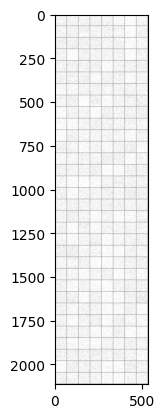

    2     2     3     2     3     1     1     0     2     3     3     3     0     0     1     0     3     0     2     0     3     2     1     1     3     1     3     2     3     2     1     3     0     0     0     0     1     0     3     0     0     3     0     1     3     2     1     2     1     2     3     2     3     0     0     3     2     0     1     0     1     0     3     0     1     3     0     1     2     2     2     0     1     1     2     0     0     3     3     2     1     0     2     2     3     0     1     2     2     2     1     2     1     0     3     1     2     2     0     0     0     3     1     3     0     2     3     3     1     1     0     2     2     1     1     1     2     3     0     3     2     1     2     2     0     2     0     0     2     2     0     3     0     2     2     3     2     3     2     1     2     1     1     2     3     1     0     1     0     3     0     2     0     1     3     0     1     2     2     0     3     3     0     2     1     1     

In [17]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images = images.type(torch.LongTensor)
labels = labels.type(torch.LongTensor)
# print images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]-1]:5d}' for j in range(batch_size)))

In [18]:
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [19]:
images = images.type(torch.FloatTensor)
labels = labels.type(torch.FloatTensor)
outputs = net(images)

In [20]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]-1]:5d}'
                              for j in range(64)))

Predicted:      2     2     2     2     3     1     1     0     2     3     0     3     0     0     1     2     3     3     2     0     3     2     1     1     3     1     0     2     2     2     1     0     2     0     0     3     1     0     2     3     2     3     3     1     0     2     1     2     1     2     3     2     3     0     0     3     2     0     1     2     1     0     3     0


In [21]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 64 test images: {100 * correct // total} %')

Accuracy of the network on the 64 test images: 76 %


In [22]:
# prepare to count predictions for each class
correct_pred = [0, 0, 0, 0]
total_pred = [0, 0, 0, 0]

# again no gradients needed
with torch.no_grad(): 
    for data in testloader:
        images, labels = data
        labels = labels.type(torch.LongTensor)
        images = images.type(torch.FloatTensor)
        # labels = labels.type(torch.FloatTensor)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[label.item()-1] += 1
            # print("correct pred:", correct_pred)
            total_pred[label.item()-1] += 1

print(len(correct_pred))
# print accuracy for each class
for i,j in enumerate(correct_pred):
    accuracy = 100 * correct_pred[i] / total_pred[i]
    print(f'Accuracy for class: {i+1:5d} is {accuracy:.1f} %')

4
Accuracy for class:     1 is 66.9 %
Accuracy for class:     2 is 98.1 %
Accuracy for class:     3 is 70.6 %
Accuracy for class:     4 is 71.0 %


In [23]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

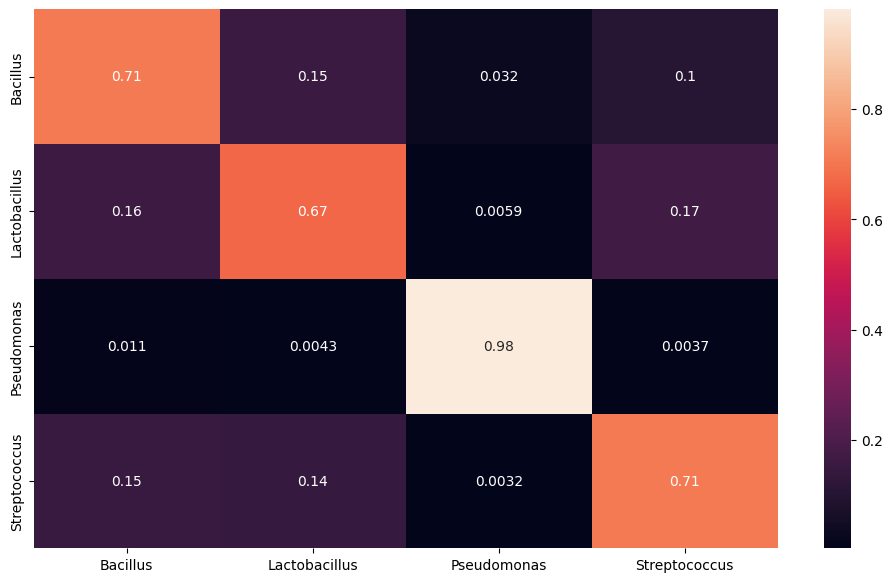

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        inputs, labels = inputs.cuda(), labels.cuda()
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('Bacillus', 'Lactobacillus', 'Pseudomonas', 'Streptococcus')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [27]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_true, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.69074844 0.69035813 0.96029258 0.71941272]
recall: [0.70955686 0.66898025 0.9813134  0.70635344]
fscore: [0.70002634 0.67950108 0.9706892  0.71282328]
support: [1873 1873 1873 1873]
